# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** This is a classification problem. There is a discrete number of outcomes: the student needs or does not need intervention. In particular is a binary classification problem.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [56]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score


%matplotlib inline  

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [66]:

# TODO: Calculate number of students
n_students = len(student_data)

# TODO: Calculate number of features
n_features = len(student_data.keys()) - 1

# TODO: Calculate passing students
n_passed = len(student_data[student_data['passed']=='yes'])

# TODO: Calculate failing students
n_failed = len(student_data[student_data['passed']=='no'])

# TODO: Calculate graduation rate
grad_rate = float(100*n_passed)/n_students

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [58]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [59]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=48)
pca.fit(X_all)
print np.cumsum(pca.explained_variance_)

[ 64.03851137  66.8639449   69.17915755  71.13745054  72.54120967
  73.69087689  74.582709    75.29169295  75.94223583  76.50548942
  77.06097405  77.54400871  77.98330289  78.38155492  78.76381415
  79.12248535  79.45229437  79.75353905  80.03224146  80.28996312
  80.51761712  80.73602228  80.93998969  81.12954547  81.30881755
  81.47474893  81.62807139  81.77532043  81.89703758  82.00644598
  82.11105854  82.21196473  82.30246435  82.38270389  82.45500382
  82.51665066  82.56762567  82.60521668  82.63944881  82.63944881
  82.63944881  82.63944881  82.63944881  82.63944881  82.63944881
  82.63944881  82.63944881  82.63944881]


### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [60]:
# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_all.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split( X_all, y_all, test_size=float(num_test)/n_students,
                                                    random_state=42)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: ** 

In order to choose a model we need to take the following into consideration

+ We have a quite small training set, therefore it may be easy to overfit especially if the model chosen has a lot of parameters to tune.
+ We have a high number of, mostly, categorical features. So the problem looks effectively high dimensional, unless we have a way to reduce significanly the number of features.
+ A simple study of Pearson correlation coefficient shows that some variables are highly correlated, while the most are low correlated according to Evans ["Straightforward statistics for the behavioral sciences" Pacific Grove, CA: Brooks/Cole Publishing (1996)]

In the next cell we calculate the Pearson correlation coefficients between all pair of features in the data. Since
the coefficient is symmetric we count each value twice. We also eliminate the autocorrelation since it is
equal to 1 by definition. We see however that some variales are perfectly anticorrelated. This is due to a
small flaw in the preprocessing made before. For instance having two **Sex** variables makes no sense. Clearly
they will be anticorrelated. The variable to be eliminated are **school_MS**, **Sex_M**,  **address_U**, 
**famsize_LE3**  and **Pstatus_T**.


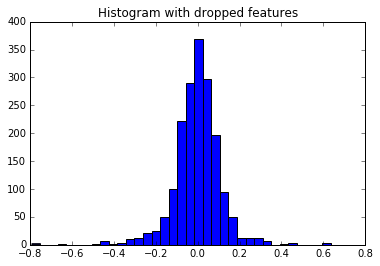

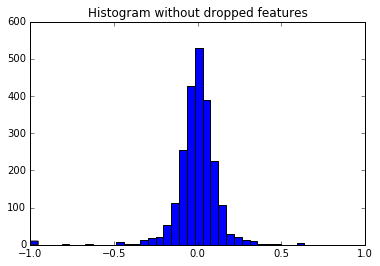

In [61]:
import matplotlib.pyplot as plt

to_drop = ['school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T']

plt.figure(1)
X_train_dropped = X_train.drop(to_drop, axis=1)
pearson = X_train_dropped.corr(method='pearson').as_matrix()
pearson = np.reshape(pearson, len(X_train_dropped.corr(method='pearson').columns)**2)
plt.title("Histogram with dropped features")
plt.hist(pearson[pearson < 0.99], bins=35);


plt.figure(2)
pearson = X_train.corr(method='pearson').as_matrix()
pearson = np.reshape(pearson, len(X_train.corr(method='pearson').columns)**2)
plt.xlim([-1.0,1.0])
plt.title("Histogram without dropped features")
plt.hist(pearson[pearson < 0.99], bins=35);


**Answer (Continuing): ** 

Given the above described situation:

+ Naive Bayes approaches assume that the features are very low correlated. If we eliminate maximum anticorrelated variables, then Naive Bayes could be used.
+ KNN method may be risky since it suffers from the curse of dimensionality, and with small training set and high number of features may not be the best choice.
+ Among the ensemble methods, in the literature one can find that AdaBoost and RandomForest perform similarly, so one can choose one of them and not both, not to be redundant.
+ Logistic Regression is good for linearly separable data. It is here difficult to understand linear separability, since we have a lot of variables to play with.

Given these premises, I adopted here the following three methods:

#### Algorithm 1: Decision Trees. 

* Advantages: They are readable and understandable, especially when they are not too deep. They are very good models for categorical features and classification purposes. They have an effective built in feature selection, since they concentrate on most informative features first, disregarding the others.
* Disadvantages: overfitting, if they are not tuned appropriately. 
* In our problem we have a high number of categorical feature and I believe the method is suited for it.

Literature on decision trees application:

* Silverstein, C. and Shieber, S. M., "Predicting individual book use for off-site storage using decision trees". ib. Q. 6(3):266–293, 1996. In this publication it is predicted the future use of books in a library, in order to help workers to select low-usage titles and organize better the library for more efficient service.

* Decaestecker, C., Remmelink, M., Salmon, I., Camby, I., Goldschmidt, D., Petein, M., Van Ham, P., and Pasteels, J. "Methodological aspects of using decision trees to characterize leiomyomatous tumors", Cytometry 24:83–92, 1995. The aim is to diagnose tumors. Given a relatively high number of features, it is desired to predict what kind of tumor the patient is facing.

The previous references and explanations have been taken from 

* "DEVELOPMENT AND APPLICATIONS OF DECISION TREES", by HUSSEIN ALMUALLIM, SHIGEO KANEDA AND YASUHIRO AKIBA, Elsevier



#### Algorithm 2: Support vector machines 

* Advantages: They are very good for linearly separable data and reach a high degree of generalization. Moreover they deal well with small training sets and lots of features. For non linearly separable data, alternative kernels are used, allowing for non linear margins and improved classification.
* Disadvantages: They may require a long training time for big datasets.
* Our dataset is made of many features and few instances. Support vector machines are very much used in these situations.

Literature on support vector machines applications:

* Kyung-Shik Shin, Taik Soo Lee and Hyun-jung Kim, "An application of support vector machines in bankruptcy prediction model", Expert Systems with Applications, Volume 28, Issue 1, January 2005. Investigation and performance of SVM to bankruptcy prediction problem. The results shows better perfomance in generalization of SVM in respect neural nets as the training set size gets smaller.

* J. Ghent and J. McDonald, "Facial Expression Classification using a One-Against-All Support Vector Machine", proceedings of the Irish Machine Vision and Image Processing Conference, Aug 2005. Example of image classification problem. We underline the fact that this paper is from 2005 and nowadays due to GPU performances, the state of the art technology for image recognition are convolutional neural networks.


#### Algorithm 3: Naive Bayes 

* Advantages: It is one of the basic models used for testing classifications on new problems (benchmark). There are no hyperparameters so the model is trivial to tune. Finally it is also faster than many other classification algotithms.
* Disadvantages: One needs to deal with the independent feature assumption before using it. One could use ICA for instance to reduce this issue to the minimum.
* For the current problem, we have quite a high number of features which we proved not to be highly correlated, and we dropped those which are highly correlated.


Literature on Naive Bayes application:

* S.L. Ting, W.H. Ip, Albert H.C. Tsang, "Is Naïve Bayes a Good Classifier for Document Classification?", International Journal of Software Engineering and Its Applications Vol. 5, No. 3, July, 2011. In this publication the authors compare the performance of Naive Bayes classifier to other commonly used ones (decision tree, neural nets and support vector machines) for the problem of document classification.

* Most of the results on applications of Naive Bayes offered by google are about text classification. We can suppose that Naive Bayes is then very much the main, or one of the main, classification algorithm in this context.


#### In the following we drop the highly correlated features!!

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [62]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [63]:
# TODO: Import the three supervised learning models from sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer

# TODO: Initialize the three models
ran = 0

for dim in [100, 200, 300]:
    X_train_dim = X_train.drop(to_drop, axis=1)[:dim]
    y_train_dim = y_train[:dim]
    clf_A = DecisionTreeClassifier(random_state=ran)
    clf_B = SVC(random_state=ran)
    clf_C = GaussianNB()
  
    train_predict(clf_A, X_train_dim, y_train_dim, X_test.drop(to_drop, axis=1), y_test)
    print ''
    train_predict(clf_B, X_train_dim, y_train_dim, X_test.drop(to_drop, axis=1), y_test)
    print ''
    train_predict(clf_C, X_train_dim, y_train_dim, X_test.drop(to_drop, axis=1), y_test)
    print ''


#print cross_val_score()    

Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.6207.

Training a SVC using a training set size of 100. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8857.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7746.

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0000 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8467.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.8029.

Training a DecisionTreeClassifier using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7287.

Training a SVC using a training set size of 200. . .
Traine

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifer 1 - Decision Tree**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.001                |    0.00                |     1.0          |   0.6207        |
| 200               |    0.001                |    0.00                |     1.0          |   0.7287        |
| 300               |    0.002                |    0.00                |     1.0          |   0.6880        |

** Classifer 3 - Support Vector Machine**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |         0.001           |   0.001                |      0.8857      |     0.7746      |
| 200               |         0.002           |   0.001                |      0.8734      |     0.7815      |
| 300               |         0.005           |   0.001                |      0.8742      |     0.7785      |

** Classifer 3 - Gaussian Naive Bayes**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               |    0.00                 |     0.00               |   0.8467         |      0.8029     |
| 200               |    0.00                 |     0.00               |   0.8387         |      0.7576     |
| 300               |    0.001                |     0.00               |   0.8103         |      0.7794     |

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

* According to previous analysis we should discard the Decision Tree model. This would be a very wrong thing to do, since the untuned model, due to the default constructor of sklearn, is clearly leading to overfitting. 

* GaussianNB and Support Vector Machines are of comparable results instead. With GaussianNB we cannot do more anyway, since there are not hyperparameters, at least in the sklearn implementation, therefore I will discard it here.

* I expect both DecisionTree classifier and Support Vector machines, to improve the results once tuned appropriately. Therefore without further analysis it would be impossible to choose between the models. Both have advantages and disadvantages. In a business contest and for comparable performances (since we find them to be comparable), decision trees will be my chosen model, since they are clearly explainable also to a non-technical audience. Moreover if the tree is not deep, a clear understanding of the underlying phenomenon will be available.


### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

A decision tree classifier classifies new data instances according to decisions taken on single values of their features. The algorithm asks a sequence of "questions" (it ask if the feature values satisfy certain properties) to the instance and depending on the answers assigns a given target variable value, i.e. a class.

The training phase consists in finding the correct sequence of questions given the answers. The choice depends on how informative certain features are in respect to others. A feature A will be more informative than a feature B if the knowledge of A allows for a better average discrimination of the class among the examples in the training set than the knowledge of B. Depending on the answer a new most informative feature is extracted , and this feature is in general different for the two answer branches. Once each possibility is explored, a classification tree is built and one can proceed to the test or prediction phase.

In this phase a new, previously unseen, data instance faces the tree, and it is asked the same question in sequence and eventually classified accordingly.

There exists techniques to tune the tree at best and avoiding that it adapts too much to the training set (overfitting) and instead commits many errors when faces the test set. For instance one could limit the depth of the tree, i.e. the maximum number of questions posed, or one can put a lower limit of the number of classes at each end of a branch.



### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [64]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'criterion': ['gini', 'entropy'], 'max_depth' : range(1, 10), 'min_samples_leaf' : range(5, 20)}

# TODO: Initialize the classifier
clf = DecisionTreeClassifier(random_state=ran)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer, cv=10)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train.drop(to_drop, axis=1), y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print clf

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train.drop(to_drop, axis=1), y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test.drop(to_drop, axis=1), y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')
Made predictions in 0.0000 seconds.
Tuned model has a training F1 score of 0.8299.
Made predictions in 0.0000 seconds.
Tuned model has a testing F1 score of 0.8000.


In [65]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
parameters = {'C': [0.01, 0.1, 1, 10], 'kernel' :['rbf', 'linear', 'poly', 'sigmoid']}

# TODO: Initialize the classifier
clf = SVC(random_state=ran)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(clf, parameters, scoring=f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj = grid_obj.fit(X_train.drop(to_drop, axis=1), y_train)

# Get the estimator
clf = grid_obj.best_estimator_
print clf

# Report the final F1 score for training and testing after parameter tuning
print "Tuned model has a training F1 score of {:.4f}.".format(predict_labels(clf, X_train.drop(to_drop, axis=1), y_train))
print "Tuned model has a testing F1 score of {:.4f}.".format(predict_labels(clf, X_test.drop(to_drop, axis=1), y_test))

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
Made predictions in 0.0020 seconds.
Tuned model has a training F1 score of 0.8499.
Made predictions in 0.0010 seconds.
Tuned model has a testing F1 score of 0.8028.


### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

* We performed the analysis using both Decision Tree classifier and Support Vector machines. The results on the test sets are comparable. The Decision Tree however has a much clearer meaning and in this particular case has only a depth of 2.
* The score is definitely improved if compared with the overfitted solution of the untuned model. Therefore I think it was a good idea not to discard the model in advance.
* For completion, instead, the score of the Support Vector Machine model, only slightly improved in respect to the untuned model.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.